In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma



In [2]:
expression <- read.csv('data/validate_layers/expression.csv', header=TRUE, row.names=1)
head(expression)

,human_759_L1,human_j12_L1,human_j3_L1,human_j4_L1,human_j6_L1,human_759_L2,human_j12_L2,human_j3_L2,human_j4_L2,human_j6_L2,⋯,X151509_WM,X151510_WM,X151669_WM,X151670_WM,X151671_WM,X151672_WM,X151673_WM,X151674_WM,X151675_WM,X151676_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.008,0.03927492,0.06363636,0.02100840,0.014925373,0.017241379,0.12571429,0.18367347,0.02564103,0.09174312,⋯,0.00000,0.005586592,0.01415094,0.000000000,0.004576659,0.002570694,0.012,0.011494253,0.007911392,0.007707129
ANGPTL4,0.008,0.17522659,0.01818182,0.04201681,0.052238806,0.004926108,0.34857143,0.05102041,0.02991453,0.08256881,⋯,0.06250,0.055865922,0.03773585,0.040935673,0.013729977,0.015424165,0.126,0.160919540,0.113924051,0.100192678
NUP133,0.088,0.09969789,0.32727273,0.18487395,0.059701493,0.169950739,0.34285714,0.82653061,0.45299145,0.24770642,⋯,0.08125,0.055865922,0.08490566,0.105263158,0.027459954,0.028277635,0.116,0.178981938,0.112341772,0.140655106
SLC6A20,0.006,0.01510574,0.00000000,0.00000000,0.089552239,0.002463054,0.01142857,0.00000000,0.01282051,0.07339450,⋯,0.00000,0.000000000,0.00000000,0.005847953,0.000000000,0.000000000,0.002,0.001642036,0.000000000,0.000000000
FRY,0.220,0.32930514,0.54545455,0.60084034,0.216417910,0.662561576,1.70285714,2.68367347,1.96153846,0.81651376,⋯,0.08750,0.050279330,0.16981132,0.111111111,0.052631579,0.028277635,0.096,0.182266010,0.080696203,0.098265896
CD8A,0.014,0.01812689,0.02727273,0.02100840,0.007462687,0.039408867,0.08571429,0.02040816,0.05982906,0.02752294,⋯,0.00625,0.005586592,0.00000000,0.005847953,0.000000000,0.002570694,0.012,0.016420361,0.004746835,0.007707129


In [3]:
annotation <- read.csv("data/validate_layers/annotation.csv", header=TRUE, row.names=1)
head(annotation)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


## Macaque markers

### Prepare the data
Let's filter Macaquesamples in expression and annotation dataframes

In [4]:
specie_annot <- annotation[annotation$condition == 'macaque',]
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
macaque_0701_L1,L1,macaque_0701,286,1516923,macaque,1
macaque_0703_L1,L1,macaque_0703,196,619127,macaque,1
macaque_0704_L1,L1,macaque_0704,285,677212,macaque,1
macaque_nb0904_L1,L1,macaque_nb0904,635,909321,macaque,1
macaque_0701_L2,L2,macaque_0701,230,2859106,macaque,2
macaque_0703_L2,L2,macaque_0703,398,3198084,macaque,2


In [5]:
specie_expr <- expression[, row.names(specie_annot)]
head(specie_expr)

,macaque_0701_L1,macaque_0703_L1,macaque_0704_L1,macaque_nb0904_L1,macaque_0701_L2,macaque_0703_L2,macaque_0704_L2,macaque_nb0904_L2,macaque_0701_L3,macaque_0703_L3,⋯,macaque_0704_L5,macaque_nb0904_L5,macaque_0701_L6,macaque_0703_L6,macaque_0704_L6,macaque_nb0904_L6,macaque_0701_WM,macaque_0703_WM,macaque_0704_WM,macaque_nb0904_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.18881119,0.09183673,0.108771930,0.033070866,0.386956522,0.304020101,0.311023622,0.049645390,0.340452261,0.377812258,⋯,0.259259259,0.044571429,0.16788321,0.200381679,0.214983713,0.032951289,0.07407407,0.085714286,0.10389610,0.01136364
ANGPTL4,0.07692308,0.07653061,0.035087719,0.036220472,0.034782609,0.035175879,0.039370079,0.035460993,0.031407035,0.035686579,⋯,0.015250545,0.012571429,0.10218978,0.091603053,0.052117264,0.021489971,0.16049383,0.057142857,0.03896104,0.02272727
NUP133,0.25524476,0.16836735,0.129824561,0.074015748,0.734782609,0.484924623,0.295275591,0.124113475,0.663316583,0.530643910,⋯,0.394335512,0.118857143,0.20072993,0.286259542,0.257328990,0.101719198,0.12345679,0.190476190,0.15584416,0.03409091
SLC6A20,0.01048951,0.01530612,0.003508772,0.014173228,0.017391304,0.005025126,0.003937008,0.000000000,0.003768844,0.006206362,⋯,0.004357298,0.004571429,0.00000000,0.000000000,0.003257329,0.002865330,0.00000000,0.004761905,0.00000000,0.00000000
FRY,0.00000000,0.01020408,0.007017544,0.004724409,0.008695652,0.002512563,0.003937008,0.000000000,0.007537688,0.008533747,⋯,0.002178649,0.004571429,0.00729927,0.005725191,0.003257329,0.005730659,0.00000000,0.004761905,0.01298701,0.00000000
CD8A,0.01398601,0.02551020,0.007017544,0.000000000,0.034782609,0.052763819,0.015748031,0.003546099,0.016331658,0.011636928,⋯,0.002178649,0.002285714,0.00729927,0.005725191,0.000000000,0.002865330,0.01234568,0.000000000,0.00000000,0.00000000


In [6]:
specie_annot$layer <- factor(specie_annot$layer)
specie_annot$sample_id <- factor(specie_annot$sample_id)
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
macaque_0701_L1,L1,macaque_0701,286,1516923,macaque,1
macaque_0703_L1,L1,macaque_0703,196,619127,macaque,1
macaque_0704_L1,L1,macaque_0704,285,677212,macaque,1
macaque_nb0904_L1,L1,macaque_nb0904,635,909321,macaque,1
macaque_0701_L2,L2,macaque_0701,230,2859106,macaque,2
macaque_0703_L2,L2,macaque_0703,398,3198084,macaque,2


In [7]:
y <- DGEList(counts=specie_expr, samples=specie_annot)

### Filtering and normalization
Let's check a summary table

In [8]:
summary(specie_annot)

 layer           sample_id  psbulk_cells    psbulk_counts     
 L1:4   macaque_0701  :7   Min.   :  77.0   Min.   :  103562  
 L2:4   macaque_0703  :7   1st Qu.: 269.0   1st Qu.:  715271  
 L3:4   macaque_0704  :7   Median : 382.0   Median : 1765730  
 L4:4   macaque_nb0904:7   Mean   : 483.5   Mean   : 2908141  
 L5:4                      3rd Qu.: 624.5   3rd Qu.: 3511209  
 L6:4                      Max.   :1366.0   Max.   :11767665  
 WM:4                                                         
  condition            layer_c 
 Length:28          Min.   :1  
 Class :character   1st Qu.:2  
 Mode  :character   Median :4  
                    Mean   :4  
                    3rd Qu.:6  
                    Max.   :7  
                               

In [9]:
keep.genes <- filterByExpr(y, group=y$samples$layer, min.count=0.01, min.total.count=1)
table(keep.genes)

keep.genes
FALSE  TRUE 
 7676  7691 

In [10]:
y <- y[keep.genes, , keep=FALSE]

In [11]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
macaque_0701_L1,1,3915.965,1.0118490,L1,macaque_0701,286,1516923,macaque,1
macaque_0703_L1,1,2335.827,1.0363684,L1,macaque_0703,196,619127,macaque,1
macaque_0704_L1,1,1801.968,1.0323310,L1,macaque_0704,285,677212,macaque,1
macaque_nb0904_L1,1,1091.088,0.9502266,L1,macaque_nb0904,635,909321,macaque,1
macaque_0701_L2,1,9690.326,1.0309616,L2,macaque_0701,230,2859106,macaque,2
macaque_0703_L2,1,6353.839,1.0355437,L2,macaque_0703,398,3198084,macaque,2
macaque_0704_L2,1,4780.063,1.0234002,L2,macaque_0704,254,1529108,macaque,2
macaque_nb0904_L2,1,2061.681,0.9471257,L2,macaque_nb0904,282,727606,macaque,2
macaque_0701_L3,1,9514.344,1.0049217,L3,macaque_0701,796,9688087,macaque,3


In [12]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9215  0.9923  1.0103  1.0006  1.0236  1.0466 

### Data exploration

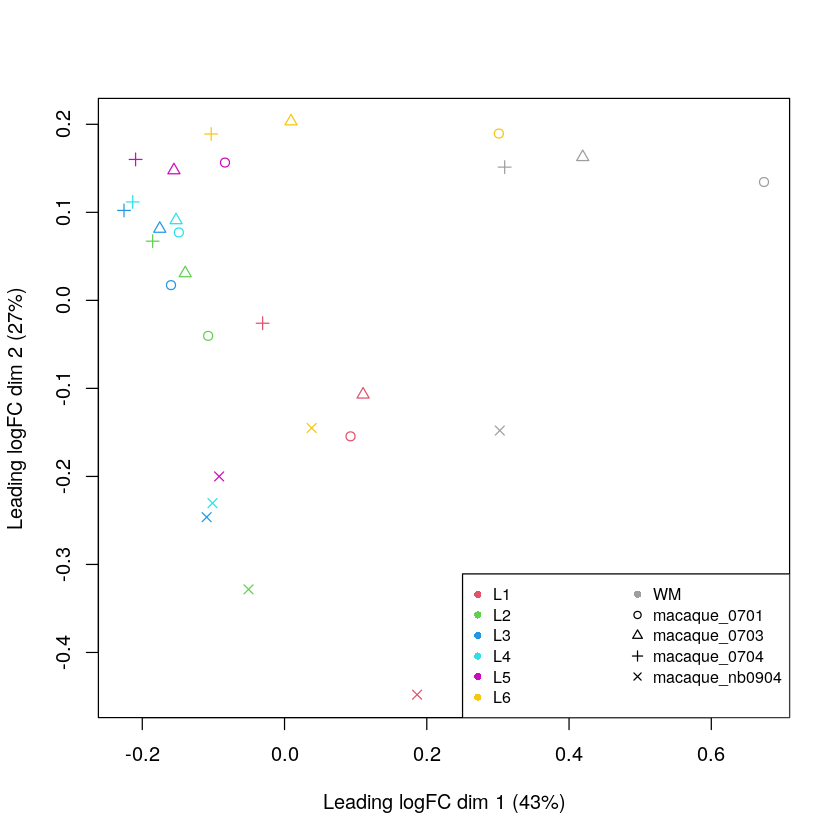

In [13]:
# Plot MDS for Macaquemarkers
layer <- as.factor(y$samples$layer)
sample_id <- y$samples$sample_id
plotMDS(y, pch=c(1:5)[sample_id], col=c(2:8)[layer])
legend("bottomright", legend=c(levels(layer), levels(sample_id)), pch=c(rep(16,7), c(1:5)), col=c(c(2:8), rep(1,5)), cex=0.8, ncol=2)

### Design matrix

In [14]:
design <- model.matrix(~ 0 + layer + sample_id)
colnames(design) <- gsub("sample_id", "", colnames(design))
colnames(design) <- gsub("layer", "", colnames(design))
head(design)

,L1,L2,L3,L4,L5,L6,WM,macaque_0703,macaque_0704,macaque_nb0904
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0


### Dispersion estimation

In [15]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 9.765625e-05

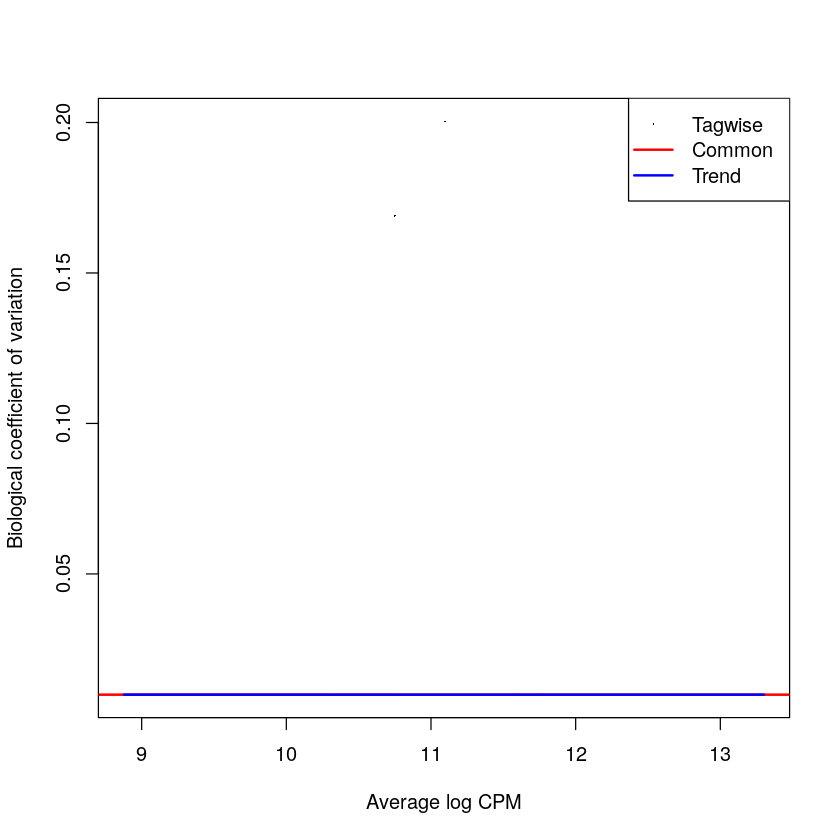

In [16]:
plotBCV(y)

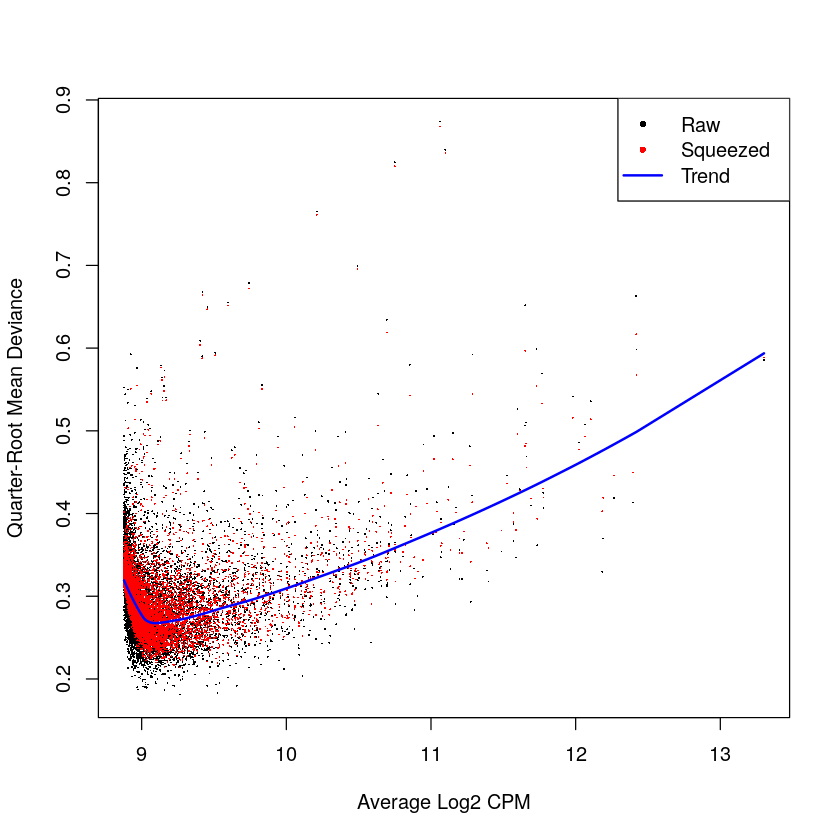

In [17]:
fit <- glmQLFit(y, design, robust=TRUE, legacy=FALSE)
plotQLDisp(fit)

### Marker genes identification
Make a contrast matrix and perform quasi-likelihood F-tests

In [18]:
ncls <- nlevels(layer)
contr <- rbind( matrix(1/(1 - ncls), ncls, ncls), matrix(0, ncol(design)-ncls, ncls) )
diag(contr) <- 1
rownames(contr) <- colnames(design)
colnames(contr) <- levels(layer)
contr
qlf <- list()
for(i in 1:ncls) {
  qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
  qlf[[i]]$comparison <- paste0(levels(layer)[i],'_vs_others')
}

,L1,L2,L3,L4,L5,L6,WM
L1,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L2,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L3,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L4,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667
L5,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667
L6,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667
WM,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000
macaque_0703,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
macaque_0704,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
macaque_nb0904,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [19]:
topTags(qlf[[1]], n=10L)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VIM,2.989875,9.271200,1145.5477,5.109449e-35,3.929677e-31
IGF2,2.757352,9.085133,684.1369,1.422575e-24,5.470512e-21
CXCL14,2.963016,10.057537,750.9059,6.162795e-24,1.579935e-20
PLPP3,1.225739,9.394119,322.6088,2.075161e-22,3.990017e-19
SLC1A3,1.580535,10.416420,556.3051,3.553352e-22,5.465766e-19
FAM107A,1.373179,9.474316,293.1344,1.121173e-21,1.333376e-18
HTRA1,1.212991,9.832203,359.9484,1.213579e-21,1.333376e-18
ATP1A2,1.278413,9.604859,294.5941,2.758452e-21,2.489041e-18
FABP7,1.581011,9.835040,388.5237,3.023122e-21,2.489041e-18


In [20]:
if (!dir.exists("data/validate_layers/macaqueDE/")) {
  dir.create("data/validate_layers/macaqueDE/", recursive = TRUE)
}
for(i in 1:ncls) write.csv(qlf[[i]]$table, file=paste0('data/validate_layers/macaqueDE/degenes_', levels(layer)[i], '.csv'))

In [21]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call('cbind', dt)
dt.all

,L1_vs_others,L2_vs_others,L3_vs_others,L4_vs_others,L5_vs_others,L6_vs_others,WM_vs_others
Down,669,545,649,585,556,262,1285
NotSig,6176,6420,5988,6234,6395,7147,5135
Up,846,726,1054,872,740,282,1271


Let's make a heatmap of the top markers

In [22]:
top <- 20
topMarkers <- list()
for (i in 1:ncls) {
  ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
  up <- qlf[[i]]$table$logFC[ord] > 0
  topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
}

topMarkers <- unique(unlist(topMarkers))
topMarkers

[1] "VIM"       "IGF2"      "CXCL14"    "PLPP3"     "SLC1A3"    "FAM107A"  
  [7] "HTRA1"     "ATP1A2"    "FABP7"     "SLC6A1"    "GLUL"      "PMP22"    
 [13] "DCN"       "S1PR1"     "HAPLN1"    "SLC1A2"    "COL1A1"    "FN1"      
 [19] "ATP1B2"    "B2M"       "PENK"      "PCDH8"     "SST"       "CALB2"    
 [25] "ARPP19"    "SERPINE2"  "NECTIN3"   "CDH13"     "CARTPT"    "SYT17"    
 [31] "HPCAL1"    "MEPE"      "CACNG3"    "CBLN2"     "SPON2"     "THBS1"    
 [37] "SPARC"     "BCL6"      "VSTM2L"    "SMARCA2"   "CA10"      "CAMK2A"   
 [43] "LNX1"      "ARPP21"    "RGS4"      "ATP1A1"    "CHN1"      "MEF2C"    
 [49] "FKBP1A"    "AP1S1"     "SLC30A3"   "NRGN"      "SPATS2L"   "LINGO1"   
 [55] "DUSP14"    "CA11"      "CYP46A1"   "HPCA"      "SH3GL2"    "SATB1"    
 [61] "BRINP1"    "PCSK1"     "NRN1"      "SNCB"      "DIRAS2"    "FBXW7"    
 [67] "KCNAB1"    "CHGA"      "NRSN1"     "LDB2"      "NDRG4"     "TTC9B"    
 [73] "SNCA"      "CAP2"      "SSBP3"     "GABARAPL1" "NPTX1"     "PFKP"     
 [79] "TBR1"      "SLC17A7"   "AK5"       "NEFL"      "TUBA4A"    "TUSC3"    
 [85] "TNNT1"     "SLC25A22"  "GOT1"      "CHN2"      "RPRM"      "ANXA6"    
 [91] "RETREG1"   "NELL1"     "PLP1"      "B3GALT2"   "TMEM178A"  "GFAP"     
 [97] "SULF1"     "KRT16"     "MBP"       "CPLX3"     "SEMA3E"    "AGT"      
[103] "CXXC5"     "SV2B"      "SEMA7A"    "SPOP"      "ADD3"      "BCAN"     
[109] "AQP4"      "CNN3"      "DBI"       "PTPRZ1"    "MLC1"      "TSC22D4"  
[115] "SCRG1"     "PSAT1"     "C3"        "ID4"       "PZP"       "HEPACAM"

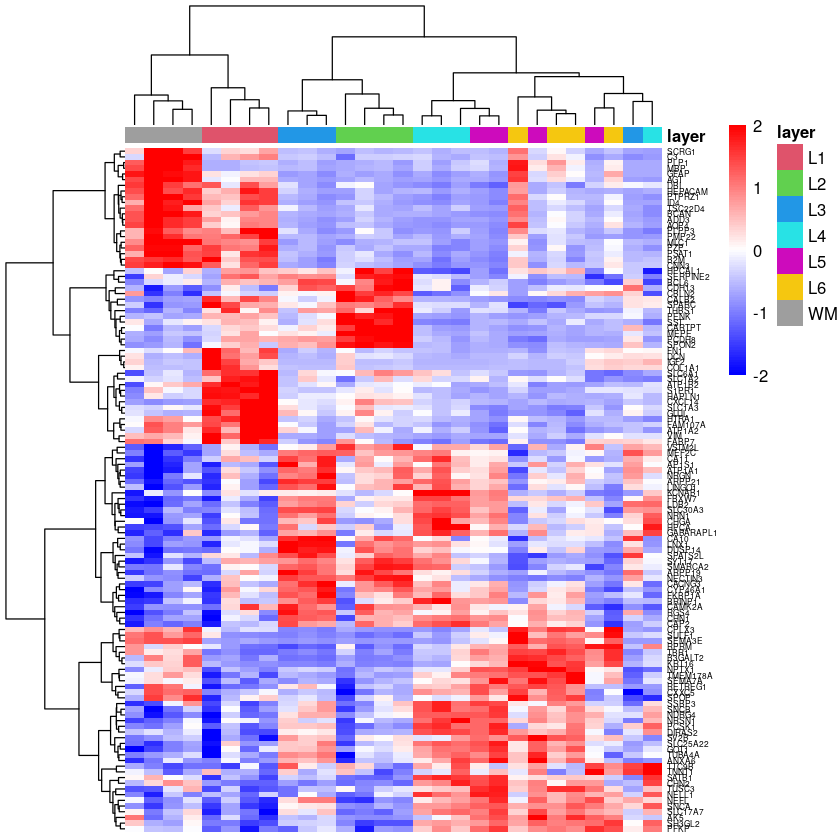

In [23]:
lcpm <- cpm(y, log=TRUE)
annot <- data.frame(layer)
rownames(annot) <- colnames(y)
ann_colors <- list(layer=2:8)
names(ann_colors$layer) <- levels(layer)
pheatmap::pheatmap(lcpm[topMarkers,], breaks=seq(-2,2,length.out=101),
                   color=colorRampPalette(c("blue", "white", "red"))(100), scale="row",
                   ckuster_cols=TRUE, border_color="NA", fontsize_row=5,
                   treeheight_row=70, treeheight_col=70, cuttree_cols=7,
                   clustering_method="ward.D2", show_colnames=FALSE,
                   annotation_col=annot, annotation_colors=ann_colors)

# Session info

In [24]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1 edgeR_4.4.2   limma_3.62.2 

loaded via a namespace (and not attached):
 [1] gtable_0.3.5       jsonlite_1.8.8     dplyr_1.1.4        compiler_4.4.0    
 [5] cra